# K-Means Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# allow charts to appear in notebook
%matplotlib inline

In [102]:
dataset = pd.read_csv('cars (dataset for k means).csv')
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,Toyota
1,31.9,4,89,71,1925,14,1980,Honda
2,17.0,8,302,140,3449,11,1971,Toyota
3,15.0,8,400,150,3761,10,1971,Toyota
4,30.5,4,98,63,2051,17,1978,Toyota


In [62]:
x = dataset[dataset.columns[:-1]]
x = x.apply(pd.to_numeric, errors='coerce')
x.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [63]:
# eliminating null values

for i in x.columns:
    x[i] = x[i].fillna(x[i].mean())
for i in x.columns:
    print(X[i].isnull().sum())

0
0
0
0
0
0
0


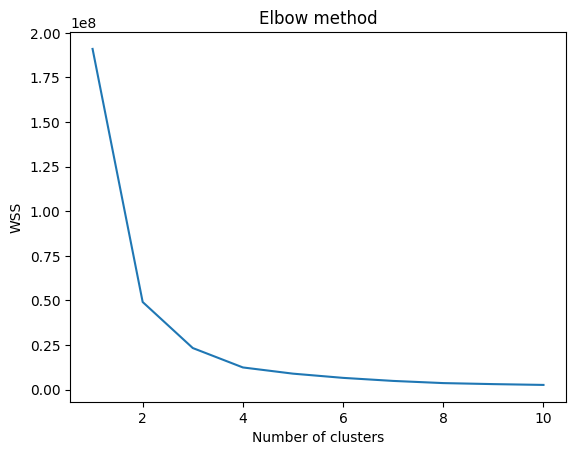

In [81]:
# using elbow method to find optimal number of clusters
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [86]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
x = x.values

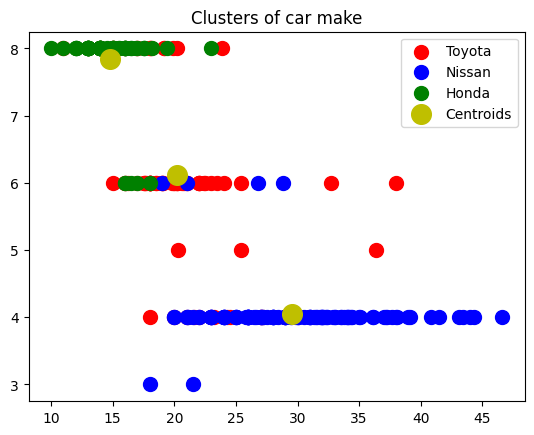

In [100]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Toyota')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Nissan')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Honda')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'y', label = 'Centroids')
plt.title('Clusters of car make')
plt.legend()
plt.show()